<a href="https://www.kaggle.com/code/zeynepsadkaylmaz/analysis-of-nobel-prize-winners-1901-2016?scriptVersionId=182448338" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')
nobel.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual             Jean Henry Dunant  1828-05-08             Geneva   
4    Individual                Frédéric Passy  1822-05-20              Paris   

      birth_country   sex   organization_name organization_city  \
0       Netherlands  Male   Berlin University            Berlin   
1            France  Male                 NaN               NaN   
2  Prussia (Poland)  Male  Marburg University           Marburg   
3       Switzerland  Male                 NaN               NaN   
4            France  Male                 NaN               NaN   

  organization_country  death_date death_city death_country  
0              Germany  1911-03-01     Berlin       Germany  
1                  NaN  1907-09-07   Châtenay        France  
2              Germany  1917-03-31    Marburg       Germany  
3                  NaN  1910-10-30     Heiden   Switzerland  
4                  NaN  1912-06-12      Paris        France

In [3]:
display(len(nobel))   #Checked the number of elements in the Nobel prizes data file
print()

911

In [4]:
nobel.info() #Data shows the basic information in the frame; data types, memory usage, number of columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [5]:
nobel.isnull().values.any() #We're looking to see if there's an empty value or not.

True

In [6]:
nobel.isnull().sum() #After checking whether there is a missing value in the DataFrame, we see how many missing values are in which column.

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [7]:
nobel[nobel['birth_date'].isnull()]  #Selects rows with missing (NaN) values in the 'birth_date' column in the DataFrame. This is how we can see the rows with missing values in any column.

year   category                              prize  \
24   1904      Peace         The Nobel Peace Prize 1904   
60   1910      Peace         The Nobel Peace Prize 1910   
89   1917      Peace         The Nobel Peace Prize 1917   
200  1938      Peace         The Nobel Peace Prize 1938   
215  1944      Peace         The Nobel Peace Prize 1944   
237  1947      Peace         The Nobel Peace Prize 1947   
238  1947      Peace         The Nobel Peace Prize 1947   
283  1954      Peace         The Nobel Peace Prize 1954   
348  1963      Peace         The Nobel Peace Prize 1963   
349  1963      Peace         The Nobel Peace Prize 1963   
366  1965      Peace         The Nobel Peace Prize 1965   
399  1969      Peace         The Nobel Peace Prize 1969   
479  1977      Peace         The Nobel Peace Prize 1977   
523  1981      Peace         The Nobel Peace Prize 1981   
558  1985      Peace         The Nobel Peace Prize 1985   
588  1988      Peace         The Nobel Peace Prize 1988   
659  1995      Peace         The Nobel Peace Prize 1995   
682  1997      Peace         The Nobel Peace Prize 1997   
703  1999      Peace         The Nobel Peace Prize 1999   
729  2001      Peace         The Nobel Peace Prize 2001   
778  2005      Peace         The Nobel Peace Prize 2005   
789  2006      Peace         The Nobel Peace Prize 2006   
800  2007      Peace         The Nobel Peace Prize 2007   
816  2009  Chemistry  The Nobel Prize in Chemistry 2009   
850  2011    Physics    The Nobel Prize in Physics 2011   
860  2012      Peace         The Nobel Peace Prize 2012   
873  2013      Peace         The Nobel Peace Prize 2013   
897  2015      Peace         The Nobel Peace Prize 2015   

                                            motivation prize_share  \
24                                                 NaN         1/1   
60                                                 NaN         1/1   
89                                                 NaN         1/1   
200                                                NaN         1/1   
215                                                NaN         1/1   
237                                                NaN         1/2   
238                                                NaN         1/2   
283                                                NaN         1/1   
348                                                NaN         1/2   
349                                                NaN         1/2   
366                                                NaN         1/1   
399                                                NaN         1/1   
479                                                NaN         1/1   
523                                                NaN         1/1   
558                                                NaN         1/1   
588                                                NaN         1/1   
659  "for their efforts to diminish the part played...         1/2   
682  "for their work for the banning and clearing o...         1/2   
703  "in recognition of the organization's pioneeri...         1/1   
729  "for their work for a better organized and mor...         1/2   
778  "for their efforts to prevent nuclear energy f...         1/2   
789  "for their efforts to create economic and soci...         1/2   
800  "for their efforts to build up and disseminate...         1/2   
816  "for studies of the structure and function of ...         1/3   
850  "for the discovery of the accelerating expansi...         1/2   
860  "for over six decades contributed to the advan...         1/1   
873  "for its extensive efforts to eliminate chemic...         1/1   
897  "for its decisive contribution to the building...         1/1   

     laureate_id laureate_type  \
24           467  Organization   
60           477  Organization   
89           482  Organization   
200          503  Organization   
215          482  Organization   
237          508  Organization   
238          509  Organi

In [8]:
df = pd.DataFrame(nobel)
df_cleaned = df.dropna()
print("notnull:")
print(df_cleaned) #It was used to clear rows with missing (NaN) values on the DataFrame.

notnull:
     year   category                                              prize  \
0    1901  Chemistry                  The Nobel Prize in Chemistry 1901   
2    1901   Medicine     The Nobel Prize in Physiology or Medicine 1901   
5    1901    Physics                    The Nobel Prize in Physics 1901   
6    1902  Chemistry                  The Nobel Prize in Chemistry 1902   
8    1902   Medicine     The Nobel Prize in Physiology or Medicine 1902   
..    ...        ...                                                ...   
819  2009  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
827  2009    Physics                    The Nobel Prize in Physics 2009   
833  2010  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
836  2010   Medicine     The Nobel Prize in Physiology or Medicine 2010   
856  2012  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
0    "in recognition

In [9]:
display(nobel['sex'].value_counts()) 
print()  #The frequency of the values in the gender column in the DataFrame was calculated, resulting in a total of how many women and how many men received the award

sex
Male      836
Female     49
Name: count, dtype: int64

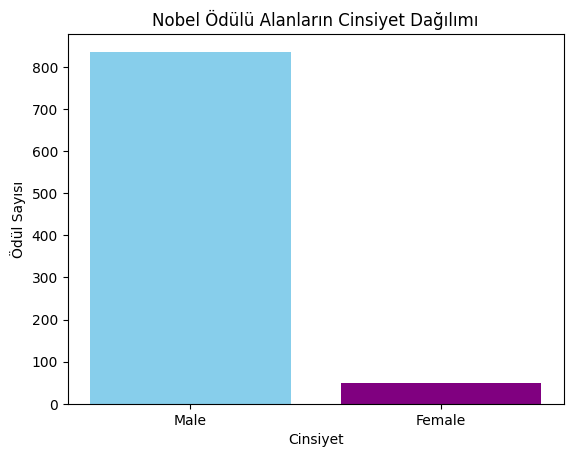

In [10]:
gender = nobel["sex"].value_counts()    
fig, ax = plt.subplots()
ax.bar(gender.index, gender, color=['skyblue', 'purple'])
ax.set_title('Nobel Ödülü Alanların Cinsiyet Dağılımı')
ax.set_xlabel('Cinsiyet')
ax.set_ylabel('Ödül Sayısı')
plt.show()   #The frequency of the values in the "gender" column in the DataFrame was visualised graphically.

In [11]:
nobel.dropna(inplace=True)
nobel.isnull().sum()

year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              0
birth_country           0
sex                     0
organization_name       0
organization_city       0
organization_country    0
death_date              0
death_city              0
death_country           0
dtype: int64

In [12]:
nobel['birth_country'].value_counts().head(10) #The frequency of the values in the "birth_country" column in the DataFrame was calculated and the top 10 most repeated values were displayed. It was found that the most awarded country was United States of America

birth_country
United States of America    121
United Kingdom               53
Germany                      36
France                       22
Sweden                       12
Netherlands                  11
Italy                         9
Austria                       9
Russia                        8
Canada                        8
Name: count, dtype: int64

In [13]:
categorical_cols = [col for col in nobel.columns if nobel[col].dtypes == "O"]
categorical_cols #Listed the names of the columns that are categorical

['category',
 'prize',
 'motivation',
 'prize_share',
 'laureate_type',
 'full_name',
 'birth_date',
 'birth_city',
 'birth_country',
 'sex',
 'organization_name',
 'organization_city',
 'organization_country',
 'death_date',
 'death_city',
 'death_country']

In [14]:
df = pd.DataFrame(nobel)
print(df.dtypes)    #We can see the data types of the columns in the DataFrame

year                     int64
category                object
prize                   object
motivation              object
prize_share             object
laureate_id              int64
laureate_type           object
full_name               object
birth_date              object
birth_city              object
birth_country           object
sex                     object
organization_name       object
organization_city       object
organization_country    object
death_date              object
death_city              object
death_country           object
dtype: object


In [15]:
#1. Find the top ten winners of the Nobel Prizes.
most_focused_countries = nobel['organization_country'].value_counts().head(10)
print("Top 10 countries with the most awards:")
print(most_focused_countries)

Top 10 countries with the most awards:
organization_country
United States of America               176
United Kingdom                          65
Germany                                 38
France                                  23
Sweden                                  15
Federal Republic of Germany             14
Switzerland                             12
Union of Soviet Socialist Republics      8
Netherlands                              7
Denmark                                  6
Name: count, dtype: int64


In [16]:
#2. List the first women to win Nobel Prizes
winer_women = nobel[nobel["sex"] == "Female"]
first_women = winer_women.loc[winer_women.groupby("full_name")["year"].idxmin()].sort_values(by="year")
first_women = first_women.head(10)
print("First Women to Win Nobel Prizes (year):")
print(first_women[['full_name', 'year', 'category']])

First Women to Win Nobel Prizes (year):
                           full_name  year   category
62       Marie Curie, née Sklodowska  1911  Chemistry
179               Irène Joliot-Curie  1935  Chemistry
235  Gerty Theresa Cori, née Radnitz  1947   Medicine
351             Maria Goeppert Mayer  1963    Physics
353         Dorothy Crowfoot Hodgkin  1964  Chemistry
478                    Rosalyn Yalow  1977   Medicine
539               Barbara McClintock  1983   Medicine
566             Rita Levi-Montalcini  1986   Medicine
586                Gertrude B. Elion  1988   Medicine
819                    Elinor Ostrom  2009  Economics


In [17]:
#3. List the first men to win Nobel Prizes.
winner_men = nobel[nobel["sex"] == "Male"]
first_men = winner_men.loc[winner_men.groupby("full_name")["year"].idxmin()].sort_values(by="year")
first_men = first_men.head(10)
print("First Men to Win Nobel Prizes (year):")
print(first_men[['full_name', 'year', 'category']])

First Men to Win Nobel Prizes (year):
                       full_name  year   category
2         Emil Adolf von Behring  1901   Medicine
5         Wilhelm Conrad Röntgen  1901    Physics
0   Jacobus Henricus van 't Hoff  1901  Chemistry
12                 Pieter Zeeman  1902    Physics
6           Hermann Emil Fischer  1902  Chemistry
8                    Ronald Ross  1902   Medicine
18                  Pierre Curie  1903    Physics
13       Svante August Arrhenius  1903  Chemistry
15           Niels Ryberg Finsen  1903   Medicine
20            Sir William Ramsay  1904  Chemistry


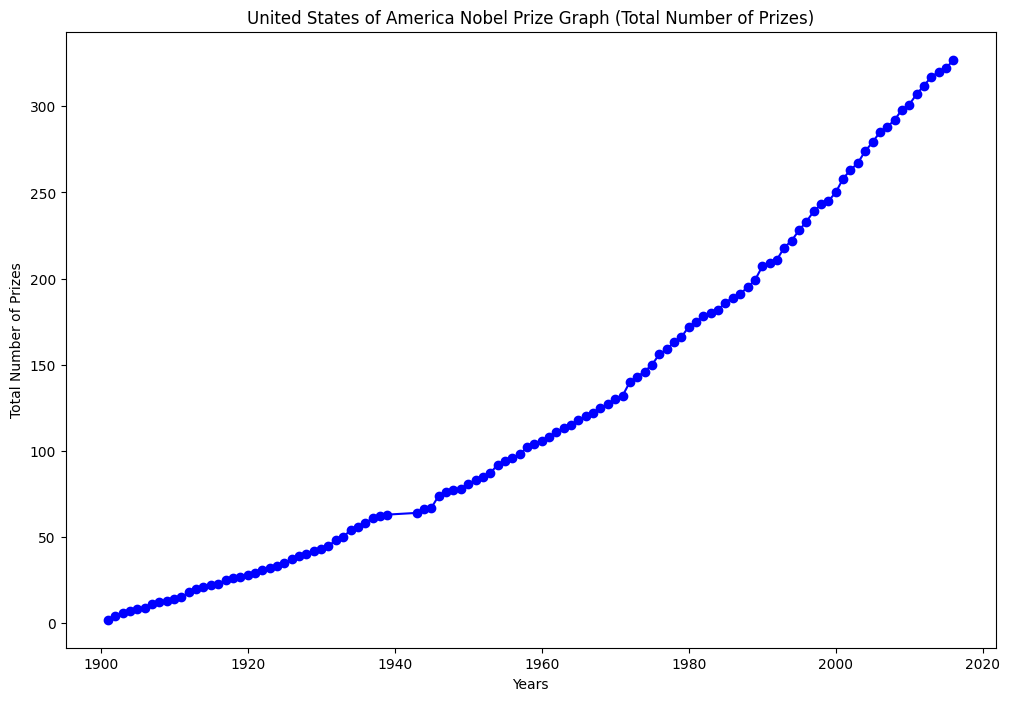

In [18]:
#4. What are the factors that play a role in the dominance of the country that has won the Nobel Prize the most and from which year onwards? Can you share your insights?
import matplotlib.pyplot as plt
import pandas as pd
nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')
most_winning_country_year = nobel.groupby(['year', 'birth_country']).size().reset_index(name='count')
most_winning_country_year = most_winning_country_year.loc[most_winning_country_year.groupby('year')['count'].idxmax()]
total_prize_numbers = nobel.groupby('birth_country').size().reset_index(name='total_count')
most_winning_country = total_prize_numbers.loc[total_prize_numbers['total_count'].idxmax()]
most_winning_country_name = most_winning_country['birth_country']
plt.figure(figsize=(12, 8))
plt.plot(most_winning_country_year['year'], most_winning_country_year['count'].cumsum(), marker='o', linestyle='-', color='b')
plt.title(f'{most_winning_country_name} Nobel Prize Graph (Total Number of Prizes)')
plt.xlabel('Years')
plt.ylabel('Total Number of Prizes')
plt.show()

There are a total of 6 different categories.


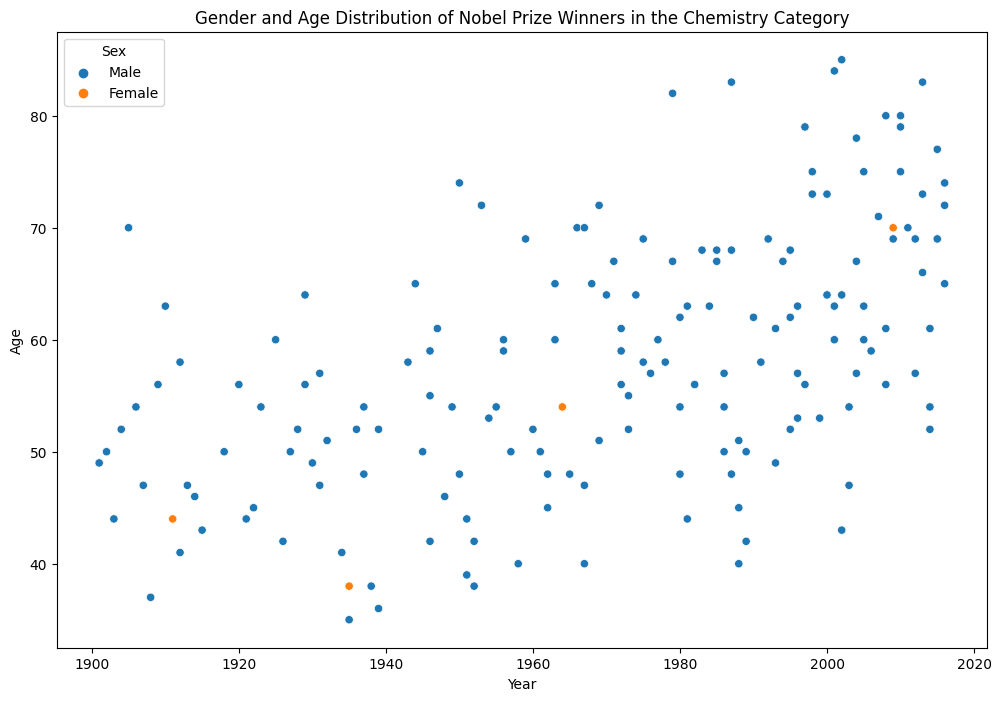

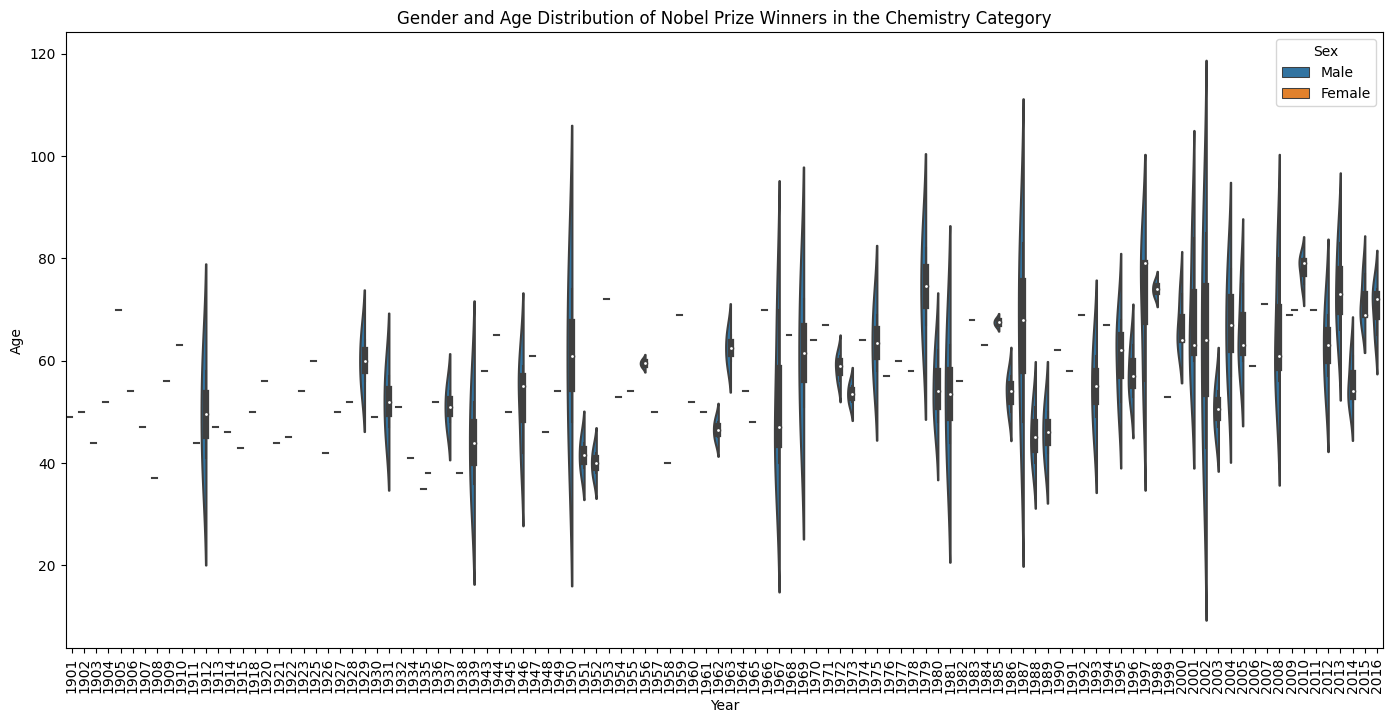

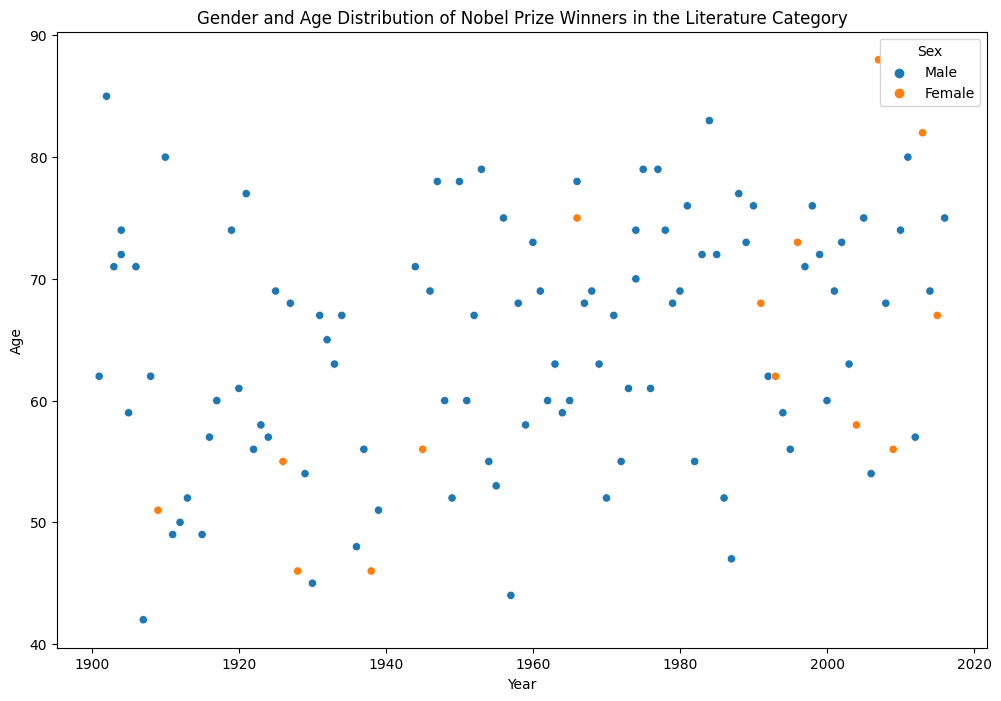

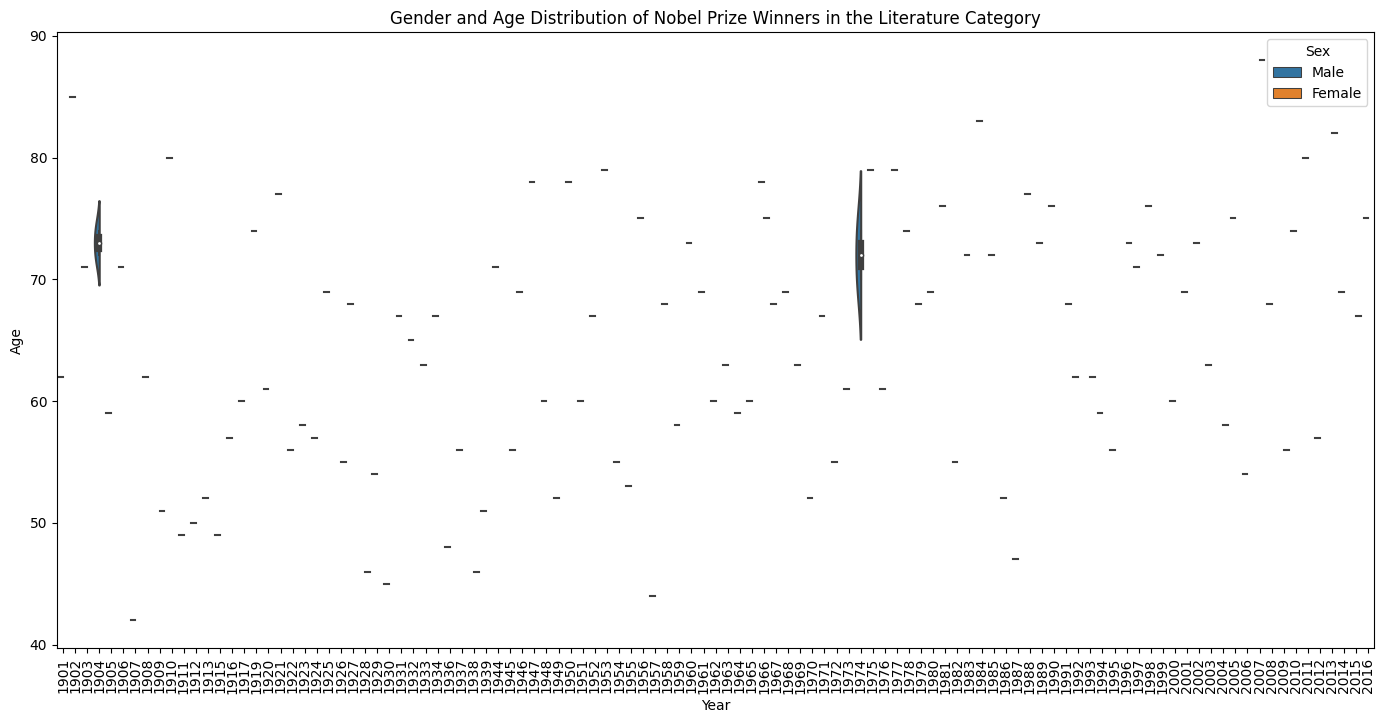

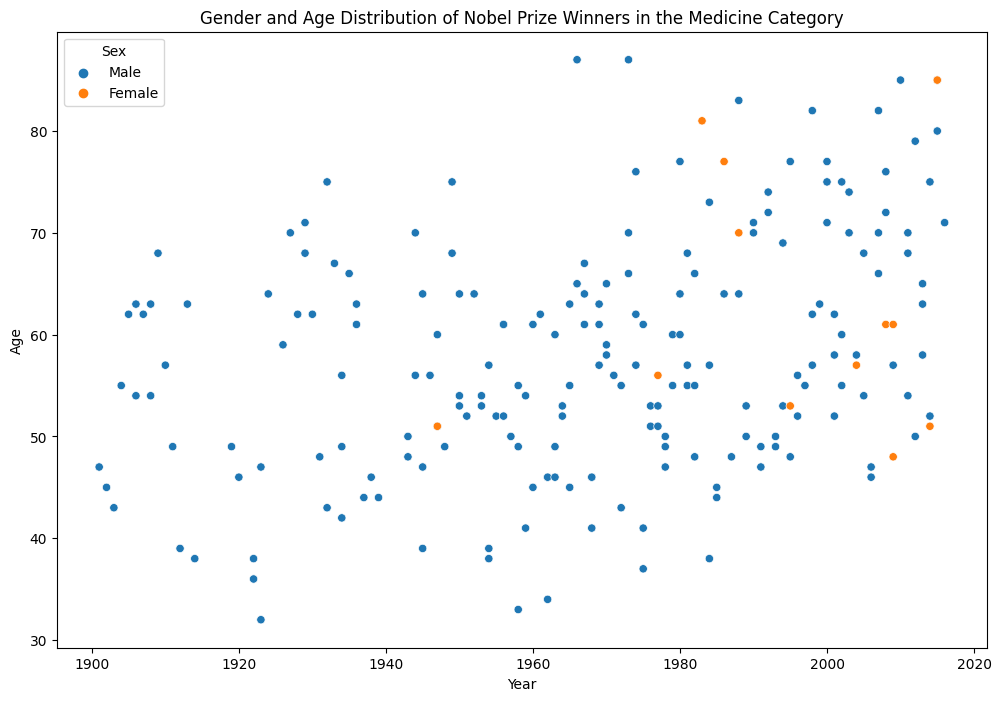

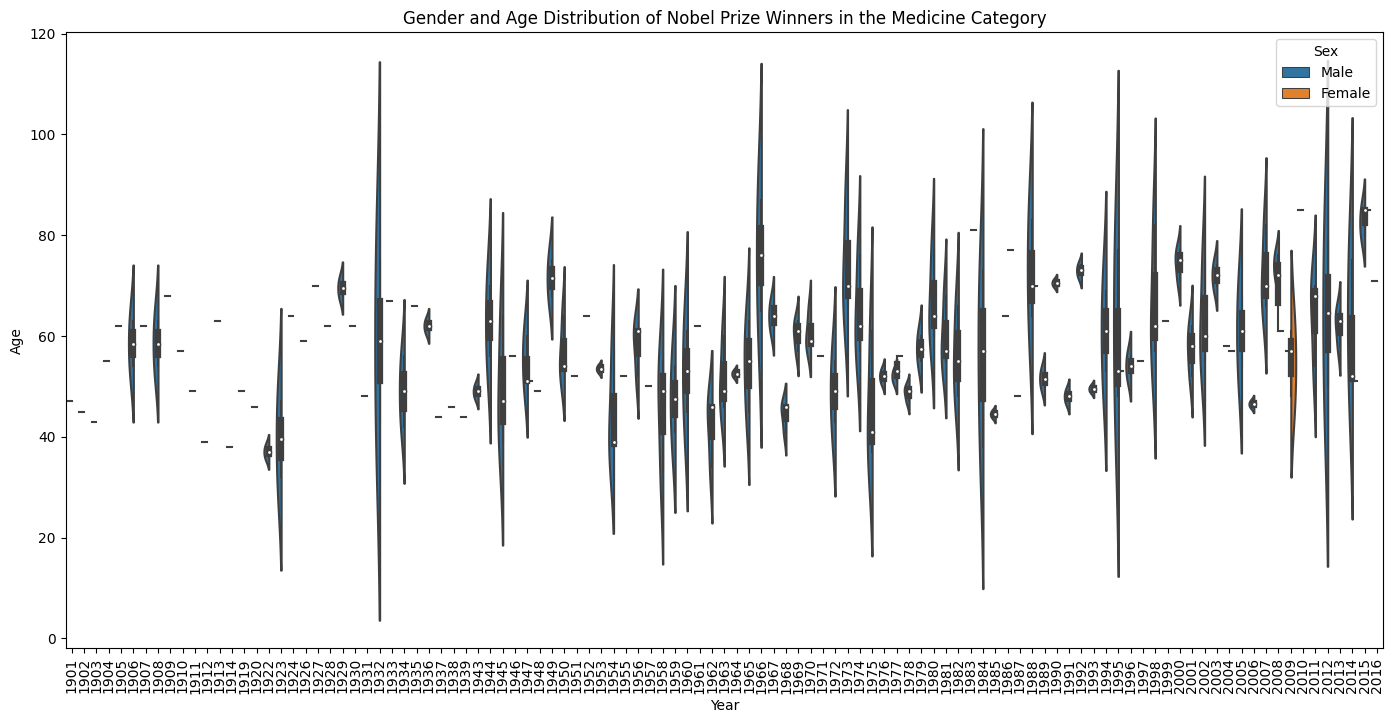

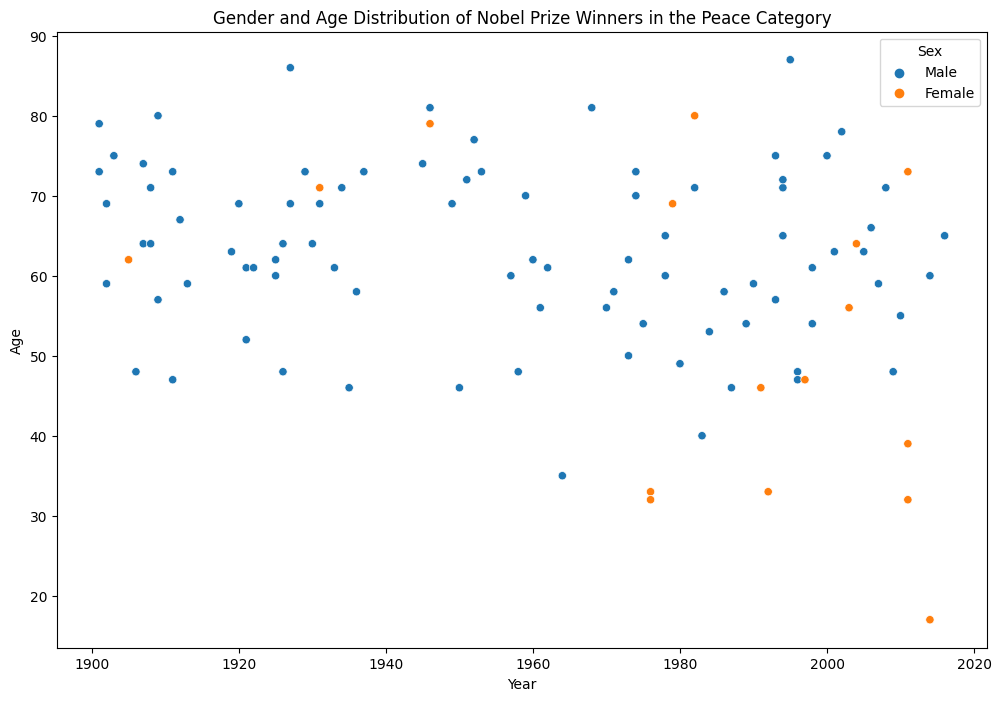

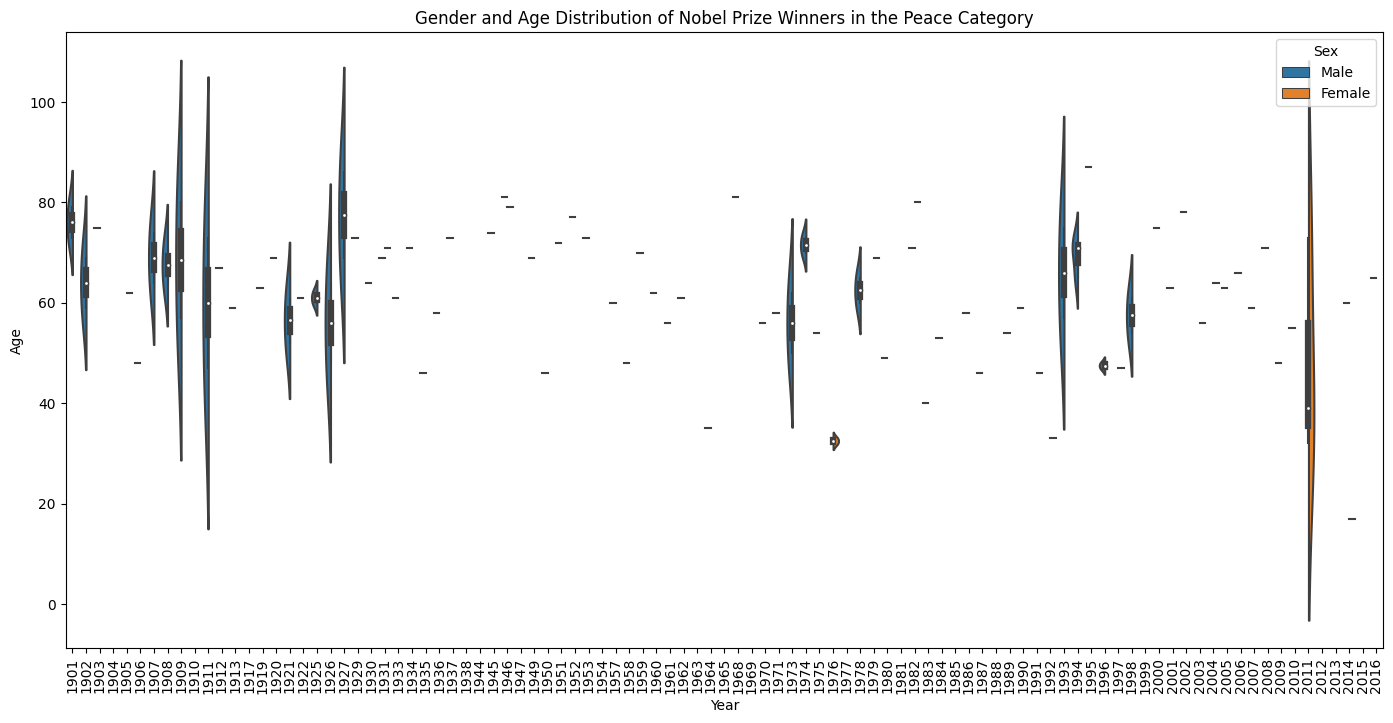

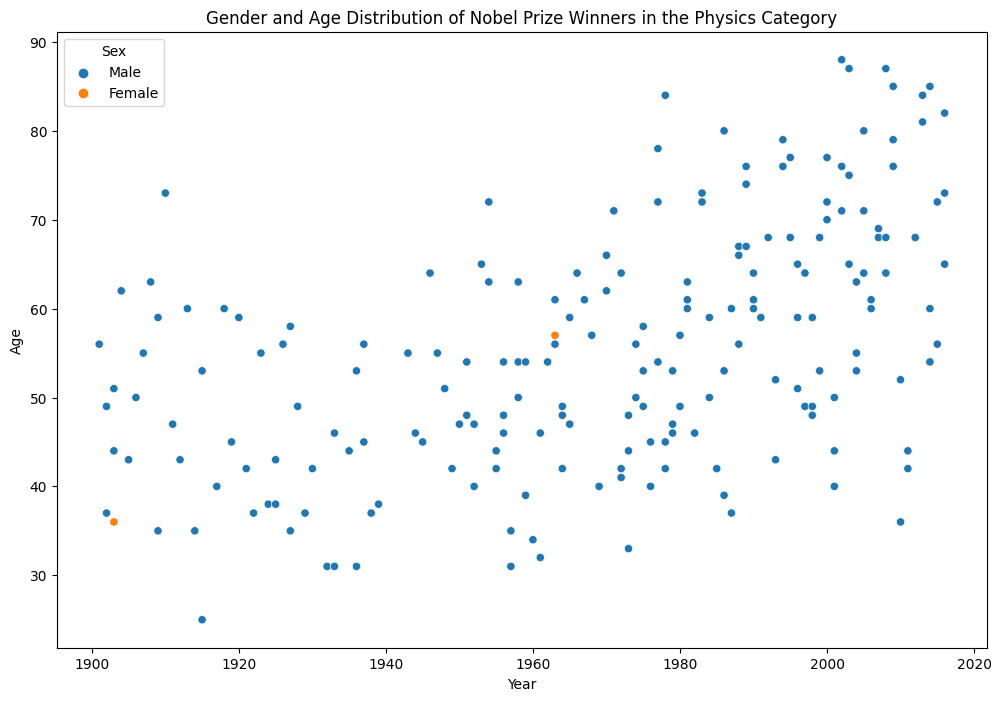

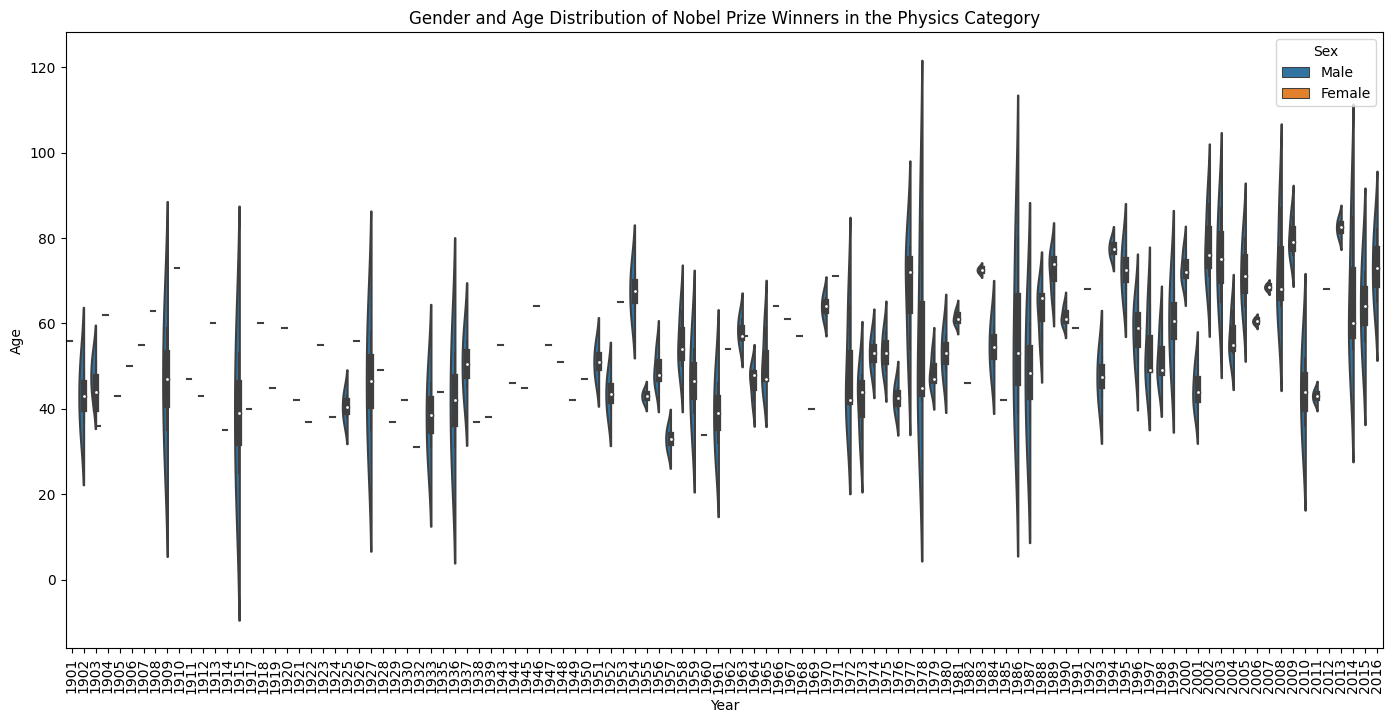

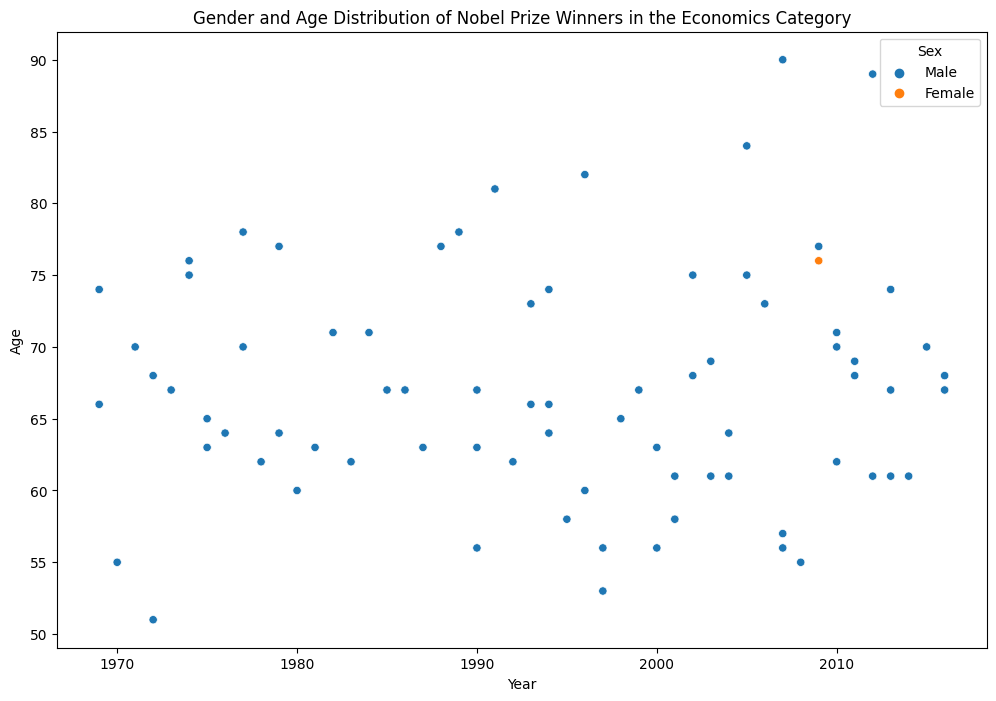

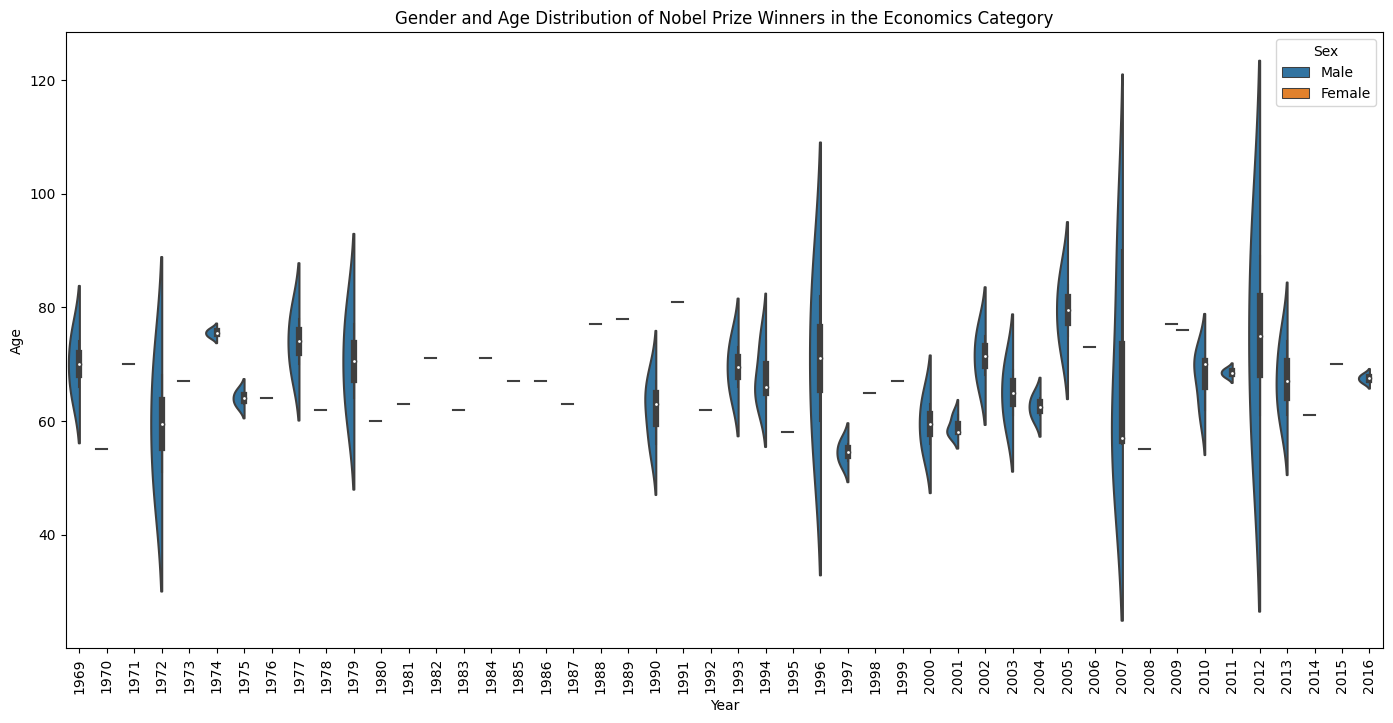

In [19]:
#5. Visualise the gender, age, award category and year of the Nobel Prize winners. (Show a separate graph for each award category) Interpret the visual according to the results.
category_number = nobel['category'].nunique()
print(f"There are a total of {category_number} different categories.")


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

nobel_subset = nobel[['sex', 'age', 'category', 'year']]

for category in nobel_subset['category'].unique():
    category_data = nobel_subset[nobel_subset['category'] == category]

    # Scatter Plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='year', y='age', hue='sex', data=category_data)
    plt.title(f'Gender and Age Distribution of Nobel Prize Winners in the {category} Category')
    plt.xlabel('Year')
    plt.ylabel('Age')
    plt.legend(title='Sex')
    plt.show()

    # Violin Plot
    plt.figure(figsize=(17, 8))
    sns.violinplot(x='year', y='age', hue='sex', data=category_data, split=True)
    plt.title(f'Gender and Age Distribution of Nobel Prize Winners in the {category} Category')
    plt.xlabel('Year')
    plt.ylabel('Age')
    plt.legend(title='Sex')
    plt.xticks(rotation='vertical')
    plt.show()


In [20]:
import pandas as pd
nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')
category_counts = nobel['category'].value_counts()
result_df = pd.DataFrame({'category': category_counts.index, 'award_count': category_counts.values})
result_df = result_df.sort_values(by='award_count', ascending=False)
print(result_df)

     category  award_count
0    Medicine          211
1     Physics          204
2   Chemistry          175
3       Peace          130
4  Literature          113
5   Economics           78


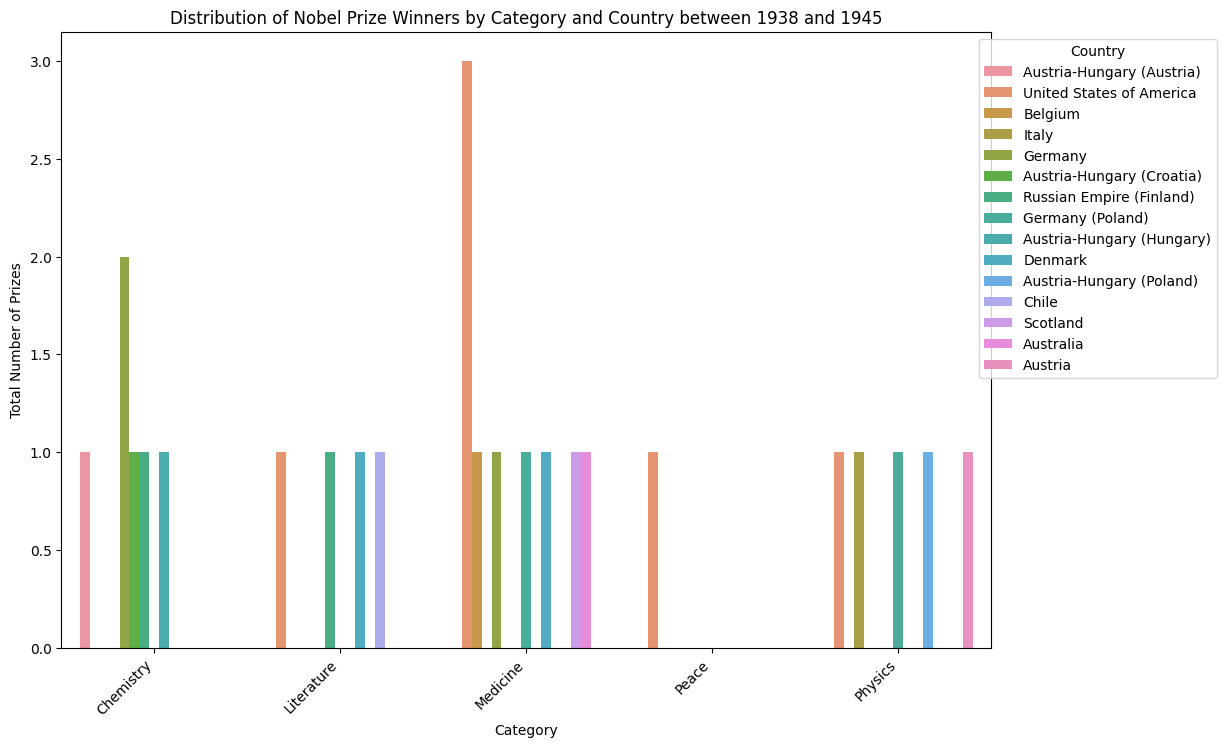

In [21]:
#6. Visualise and interpret the categories and countries of the Nobel Prize winners between 1938-1945.
nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')

nobel_1938_1945 = nobel[(nobel['year'] >= 1938) & (nobel['year'] <= 1945)]

plt.figure(figsize=(12, 8))
sns.countplot(x='category', hue='birth_country', data=nobel_1938_1945)
plt.title('Distribution of Nobel Prize Winners by Category and Country between 1938 and 1945')
plt.xlabel('Category')
plt.ylabel('Total Number of Prizes')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

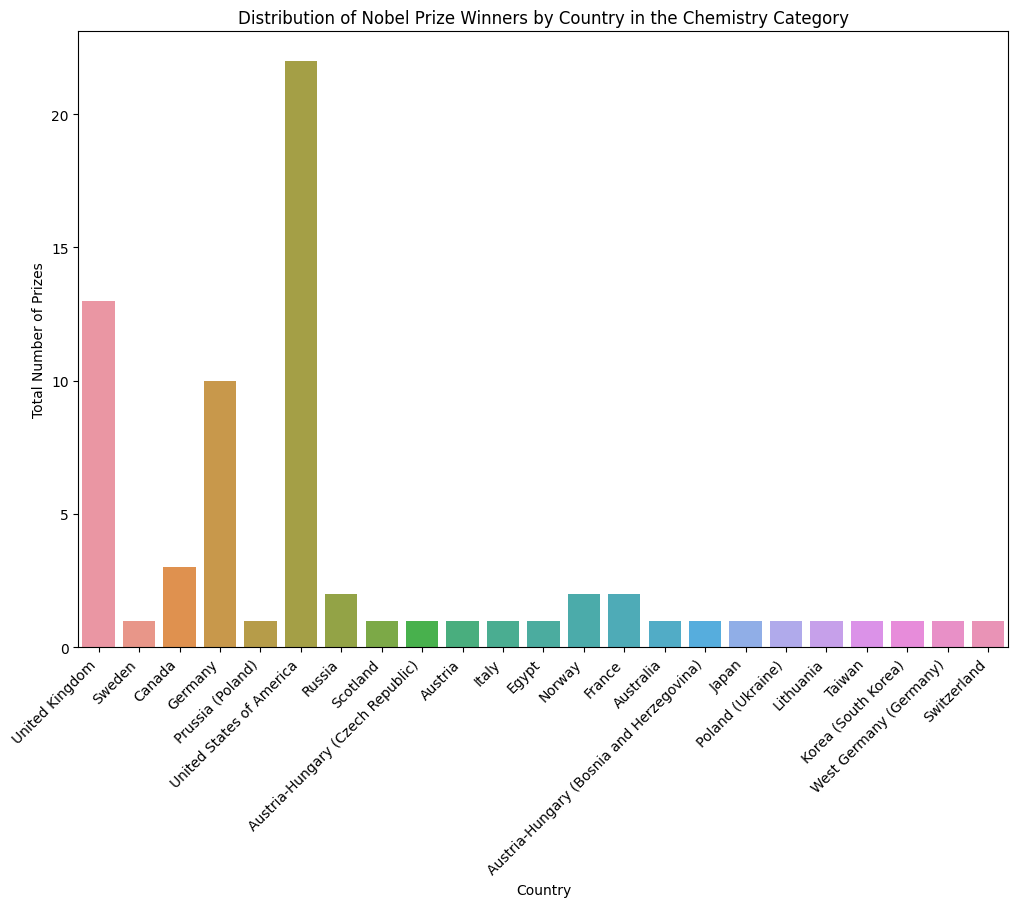

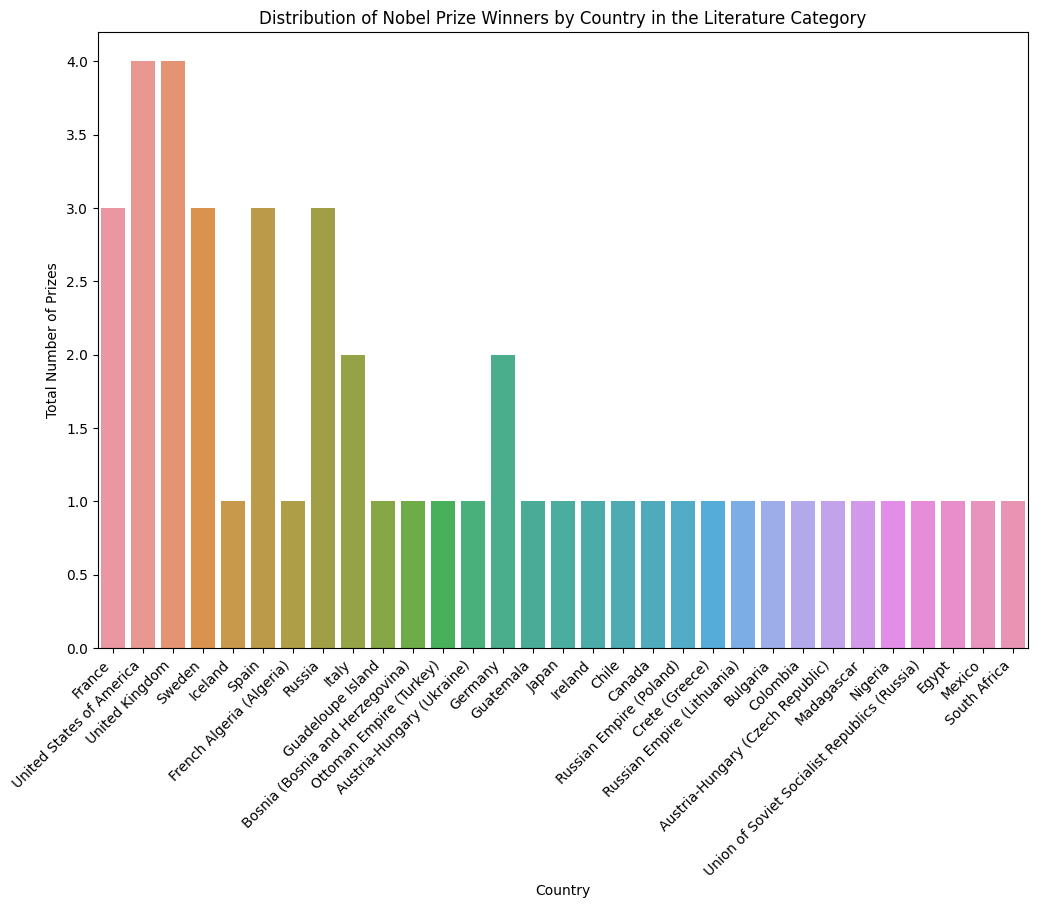

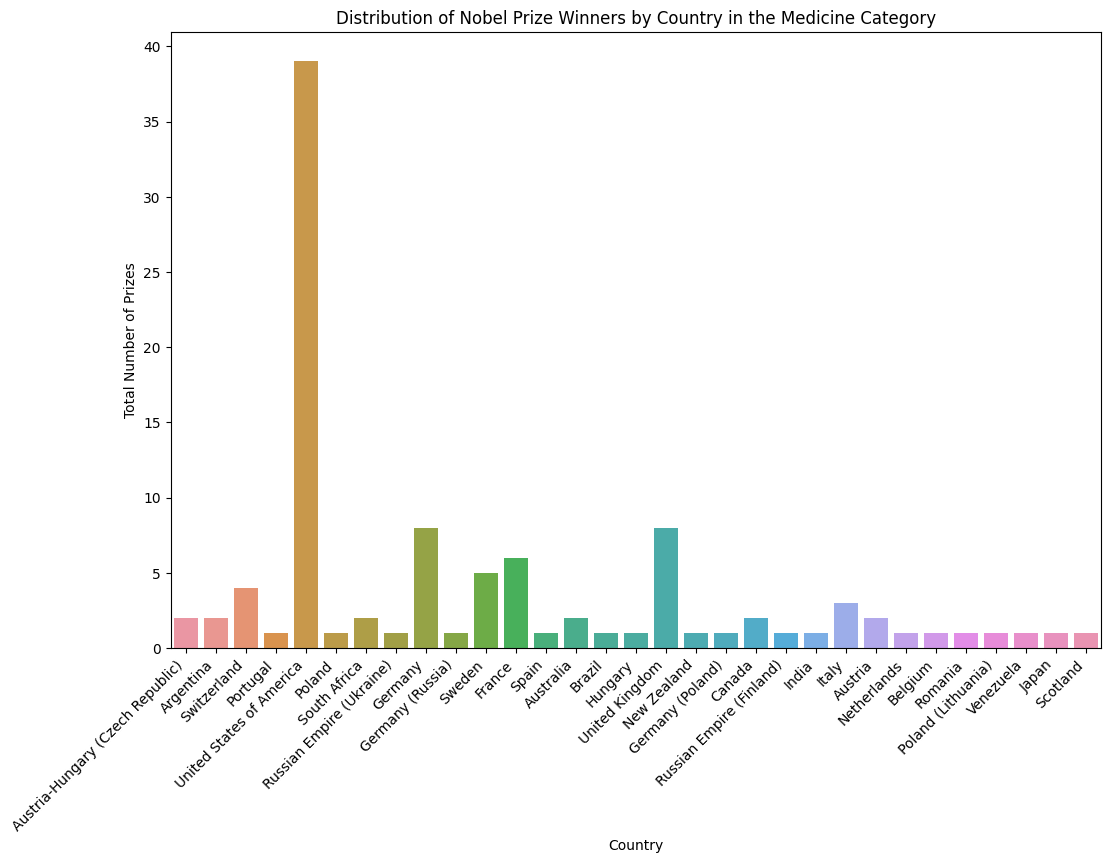

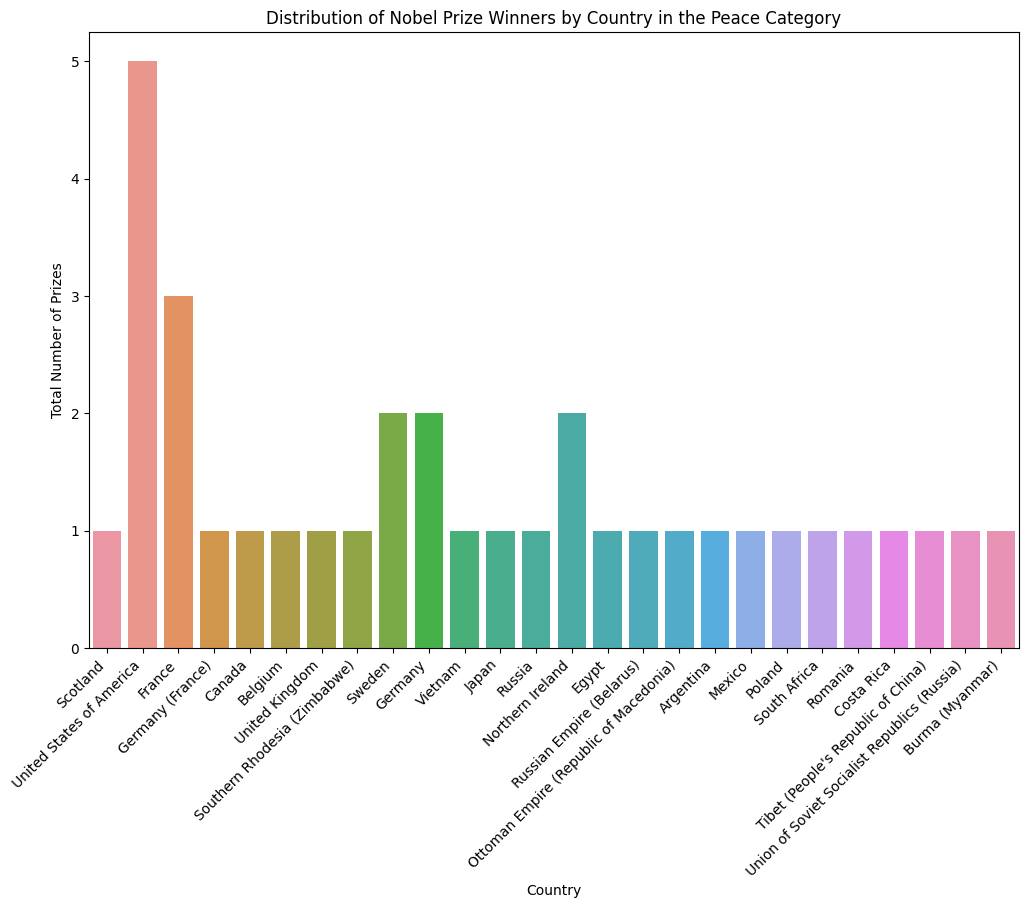

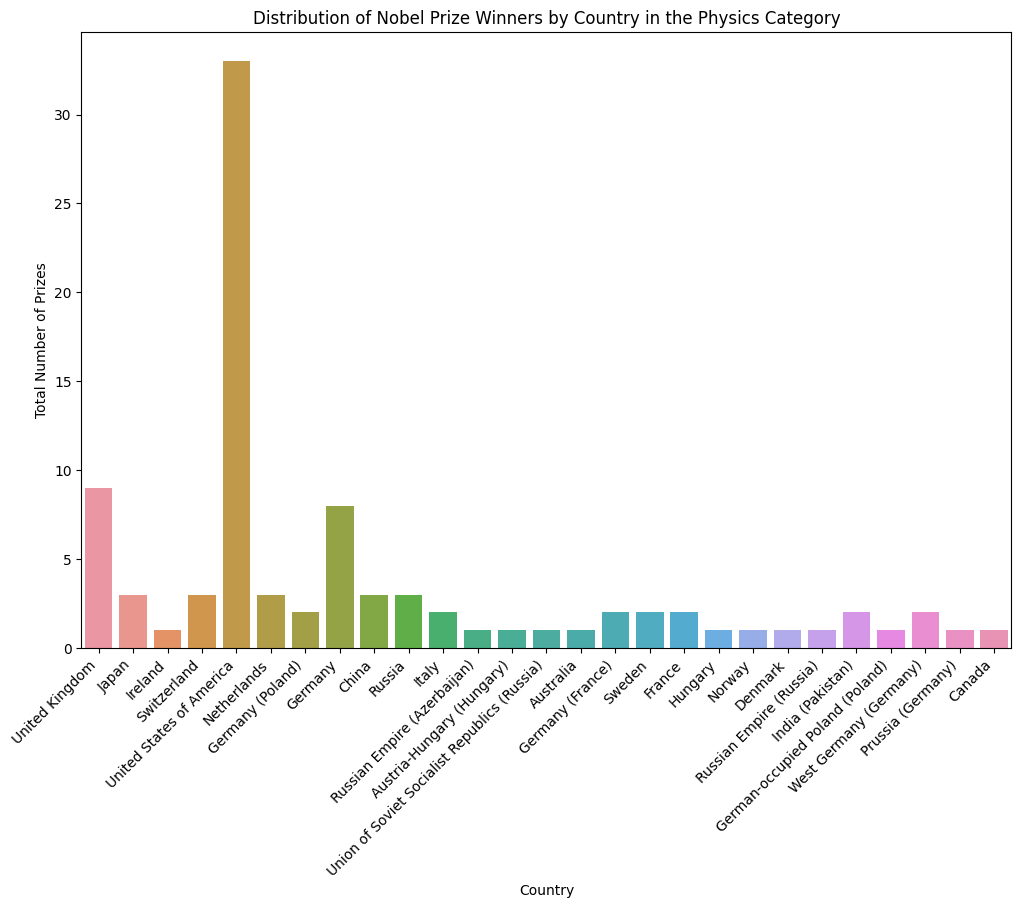

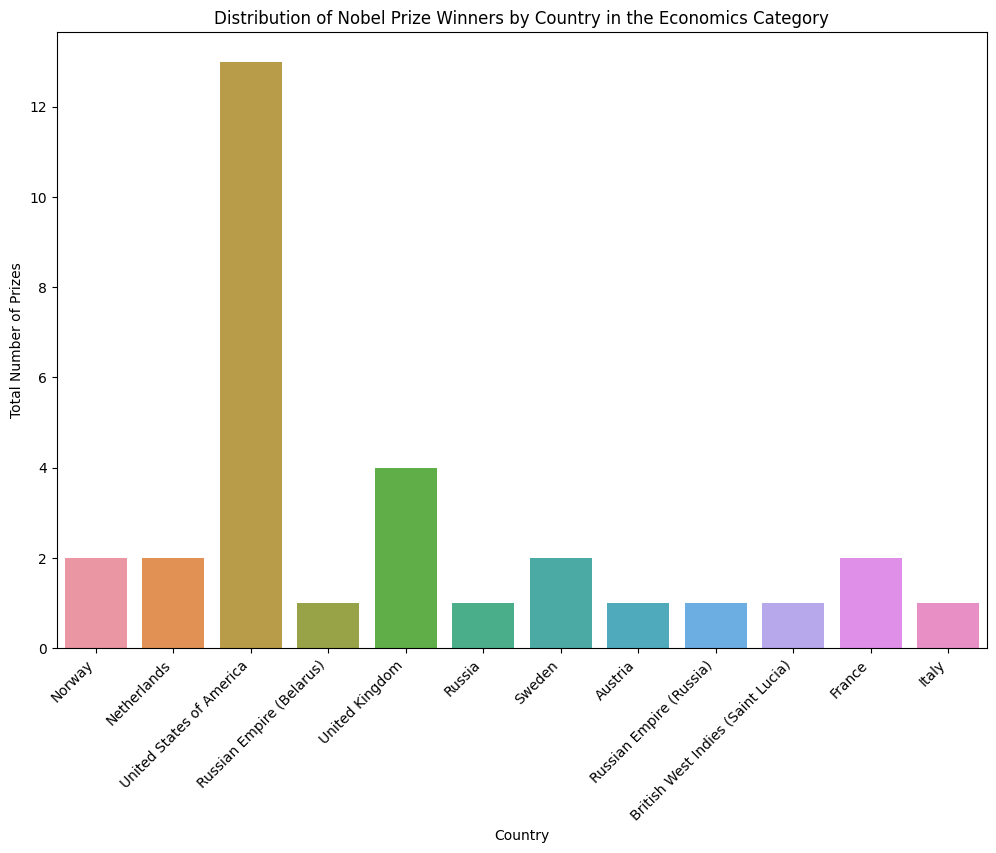

In [22]:
#7. Visualise and interpret the categories and countries of the Nobel Prize winners between 1947-1991. (A separate graph is required for each category)
nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')
nobel_1947_1991 = nobel[(nobel['year'] >= 1947) & (nobel['year'] <= 1991)]
category_list = nobel_1947_1991['category'].unique()
for category in category_list:
    category_data = nobel_1947_1991[nobel_1947_1991['category'] == category]

    plt.figure(figsize=(12, 8))
    sns.countplot(x='birth_country', data=category_data)
    plt.title(f'Distribution of Nobel Prize Winners by Country in the {category} Category')
    plt.xlabel('Country')
    plt.ylabel('Total Number of Prizes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

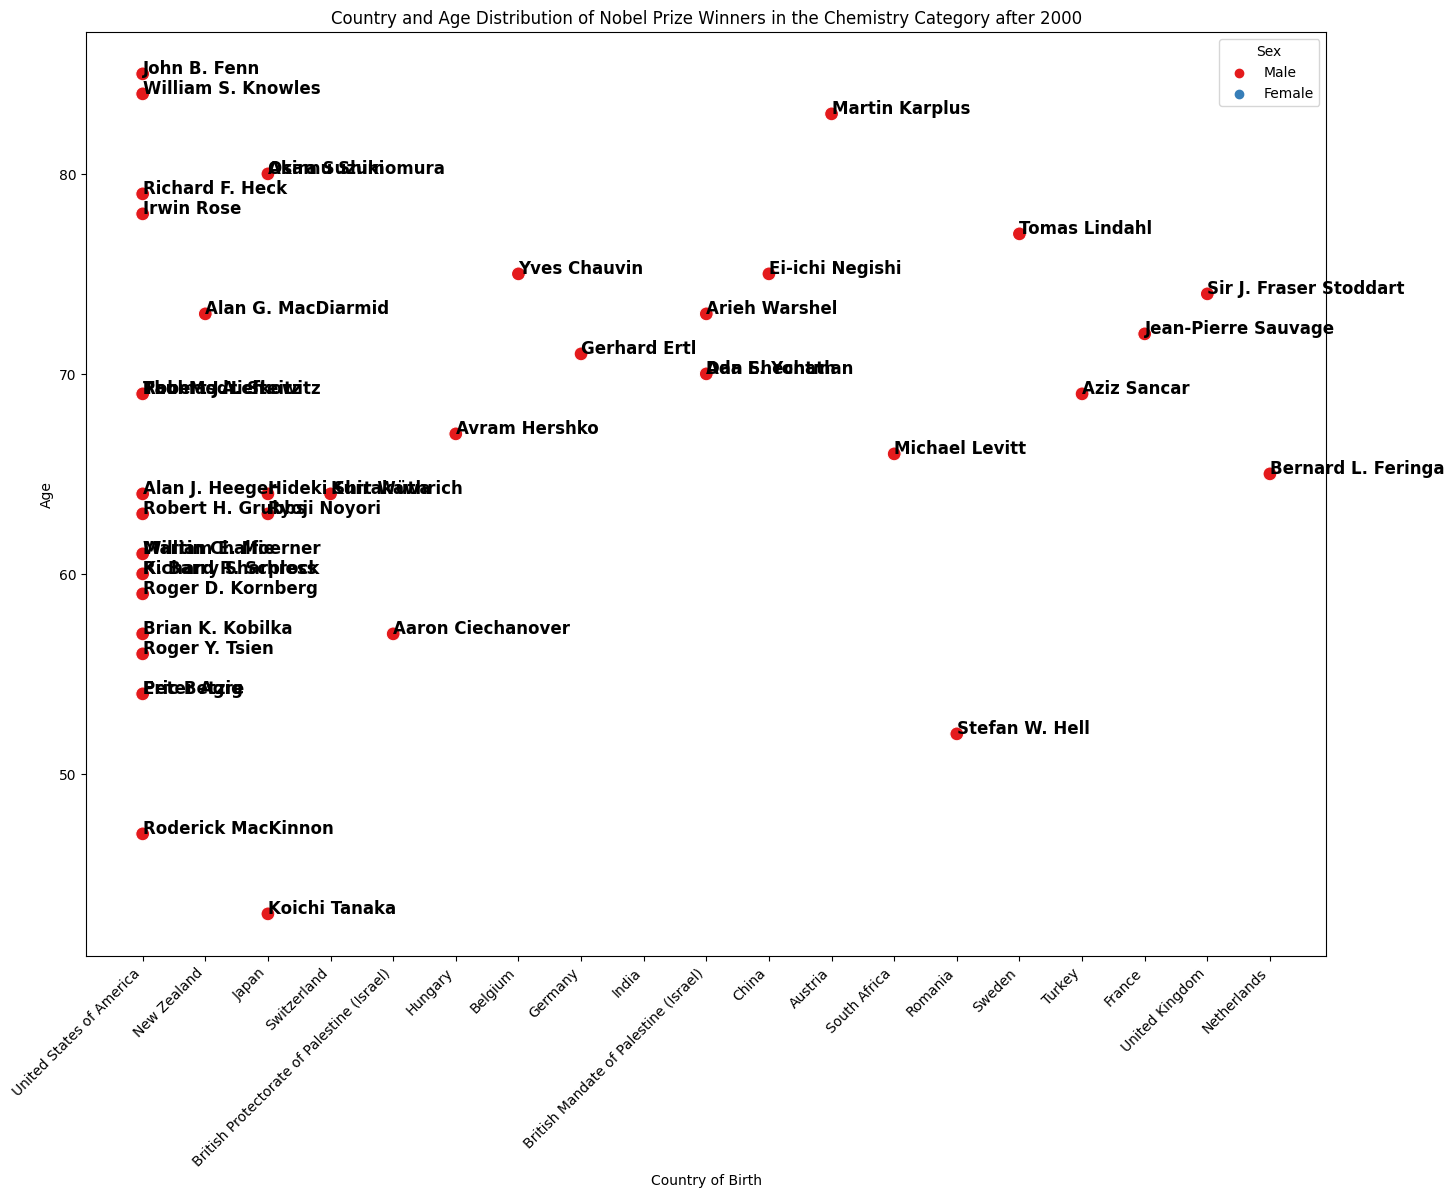

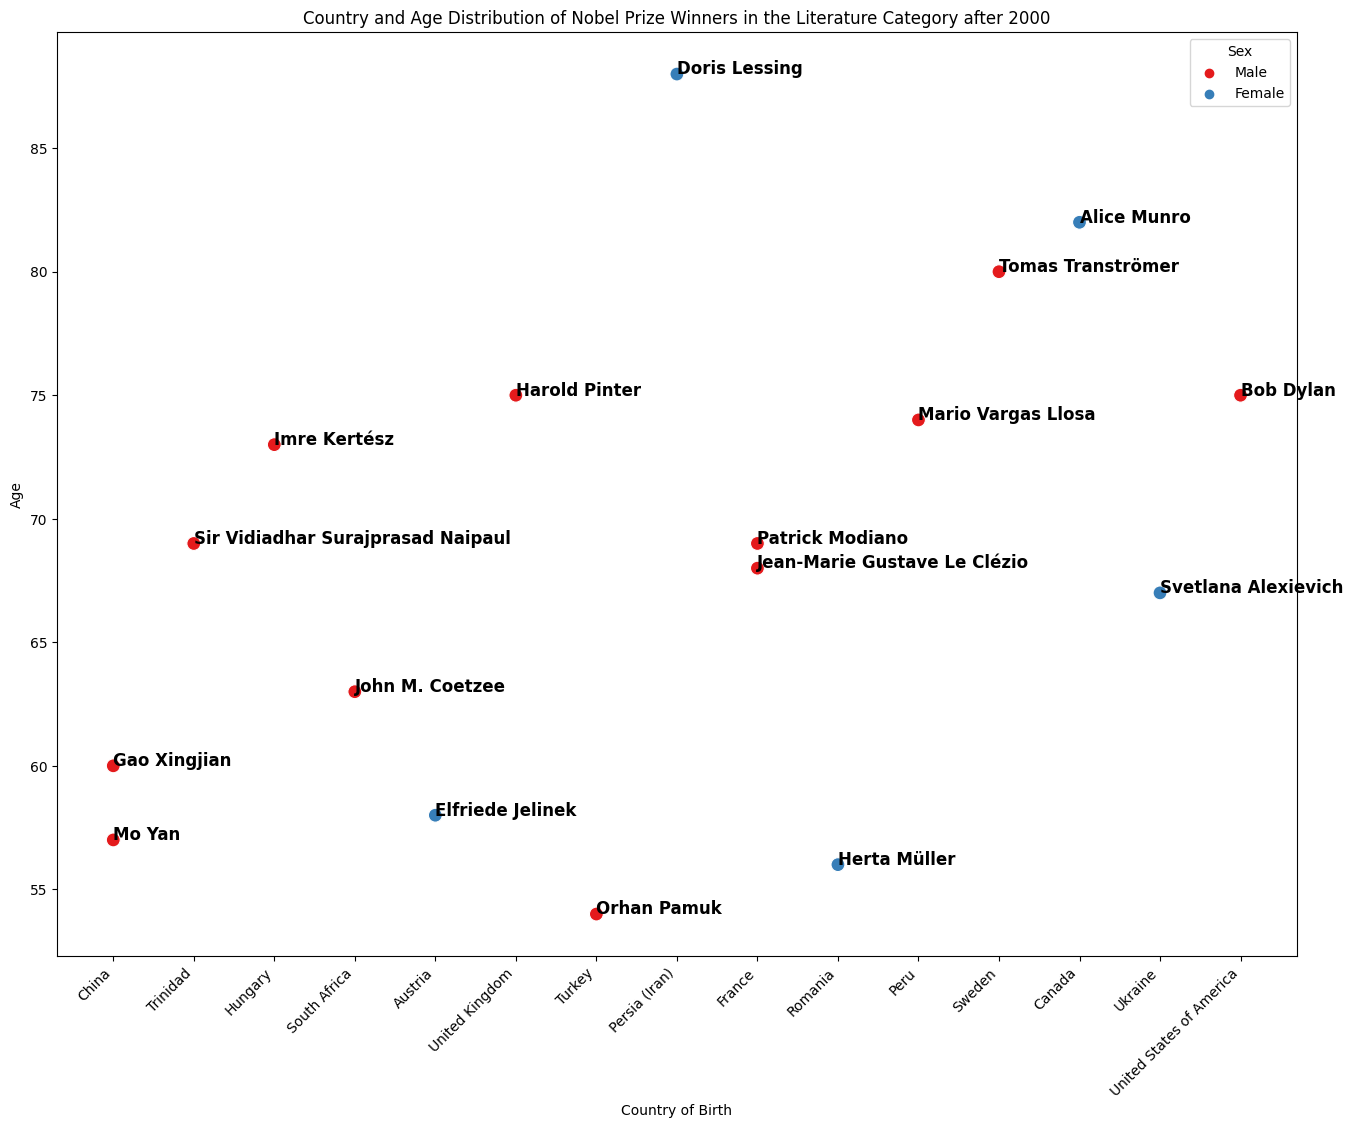

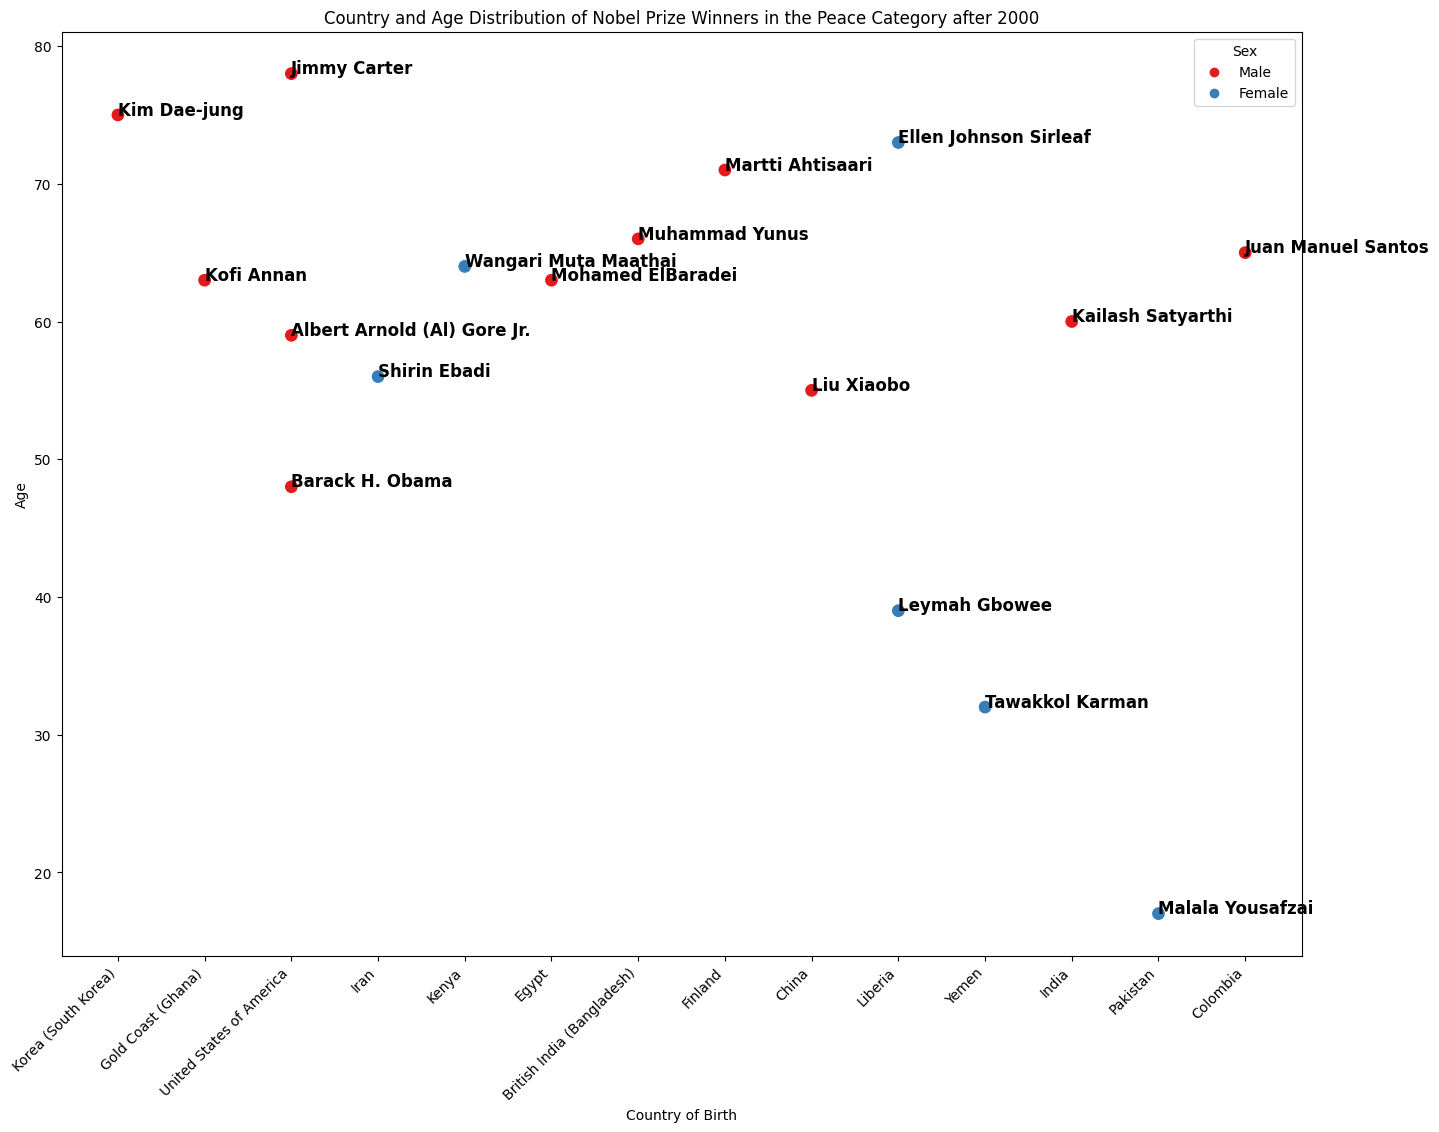

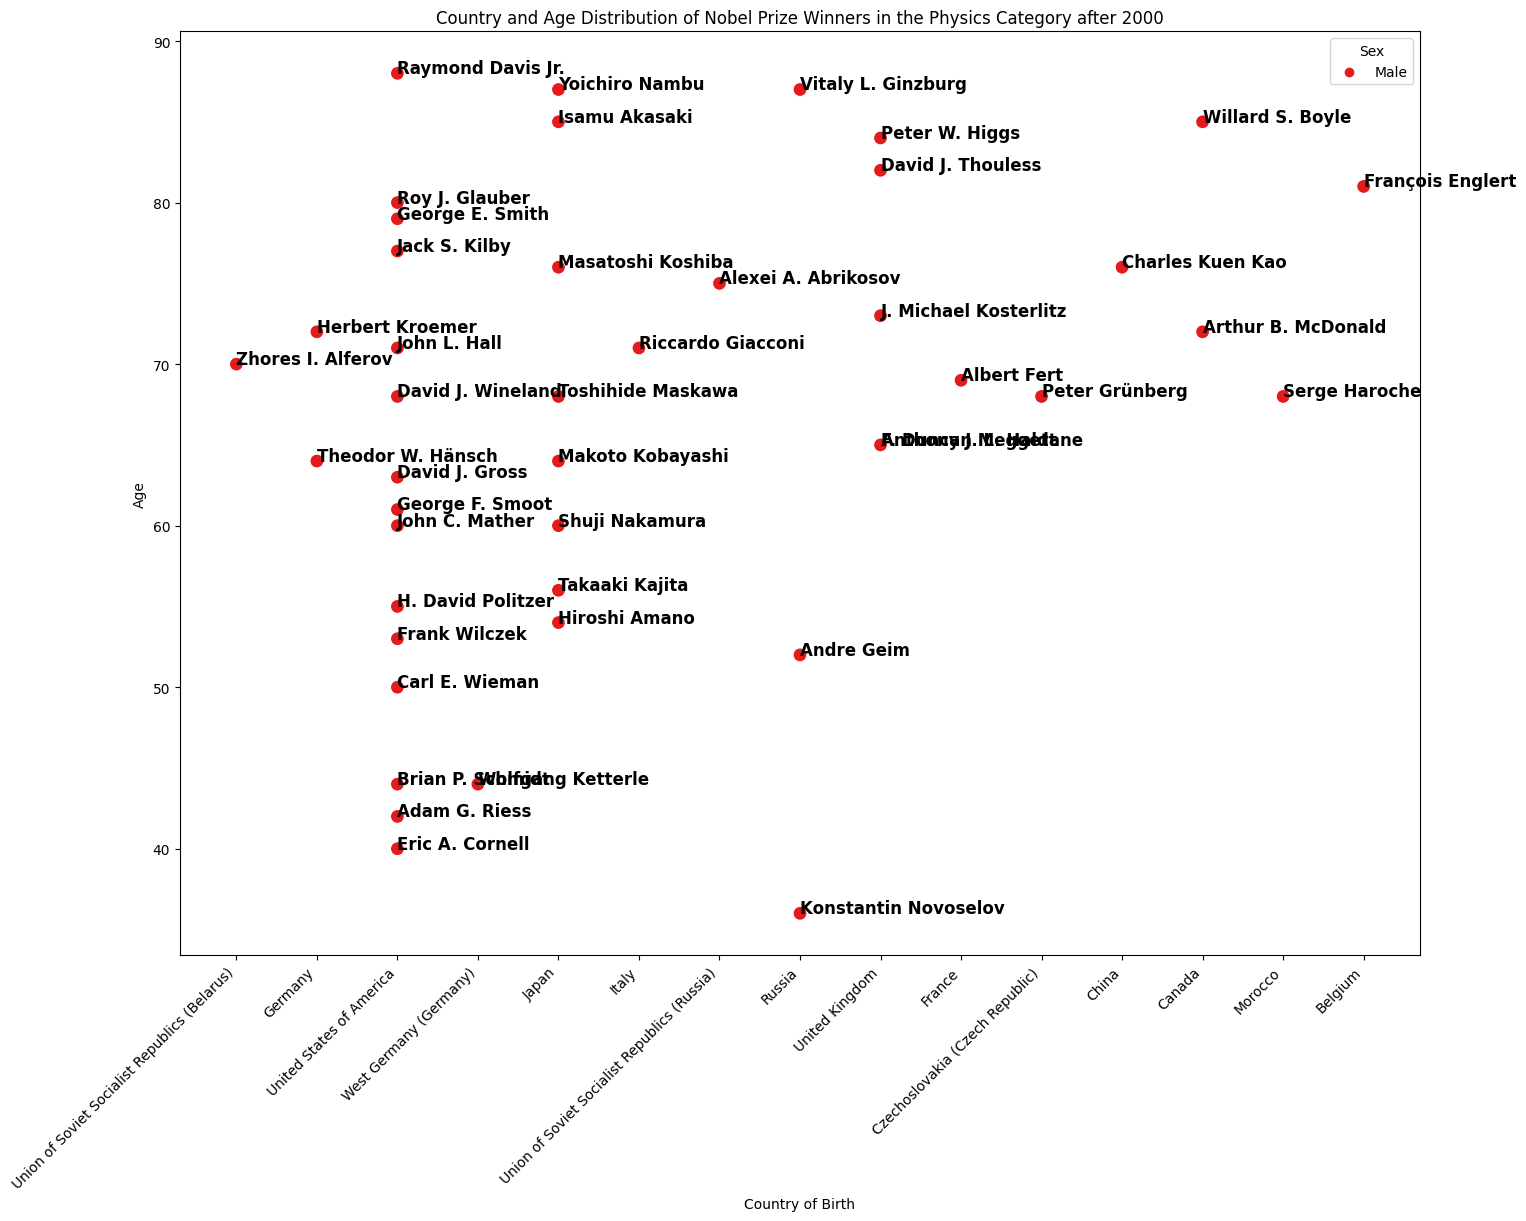

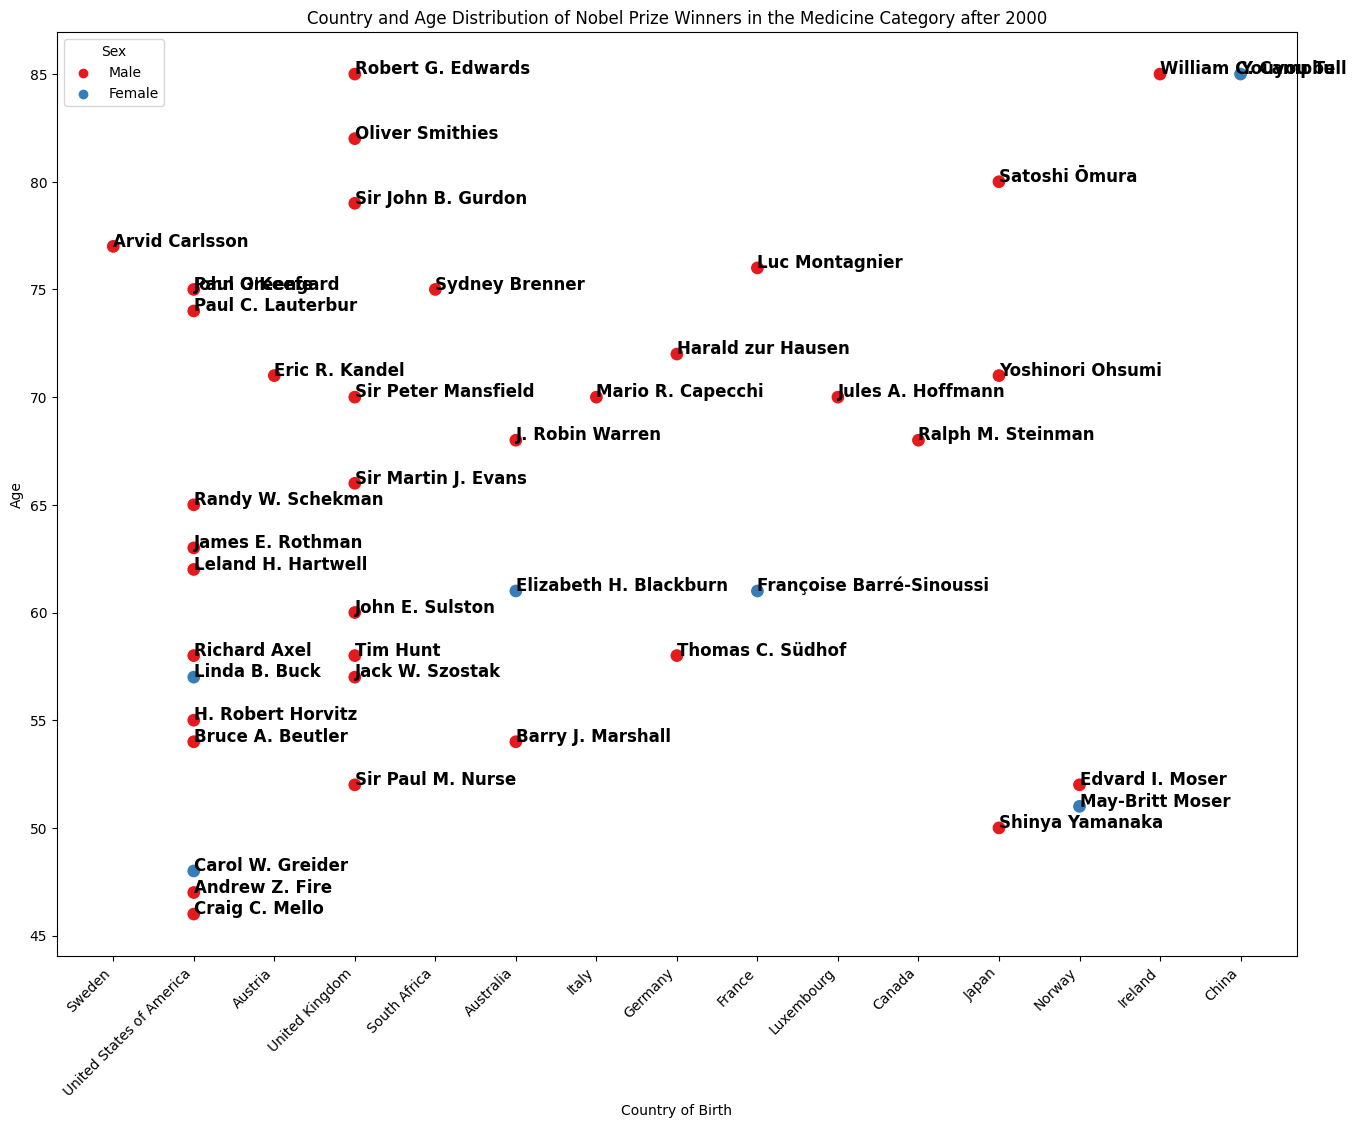

In [23]:
#8. Visualise the countries and ages of people after 2000 in the categories of Chemistry, Literature, Peace, Physics and Medicine. (Separate visualisations are required for each category) Interpret the data.
nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])     
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

nobel_2000_after = nobel[nobel['year'] >= 2000]

selected_categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']
nobel_selected_categories = nobel_2000_after[nobel_2000_after['category'].isin(selected_categories)]

for category in selected_categories:
    category_data = nobel_selected_categories[nobel_selected_categories['category'] == category]

    # Scatter Plot
    plt.figure(figsize=(16, 12))
    scatter = sns.scatterplot(x='birth_country', y='age', data=category_data, hue='sex', palette='Set1', s=100)

    for line in range(0, category_data.shape[0]):
        posx = category_data['birth_country'].iloc[line]
        posy = category_data['age'].iloc[line]

        if pd.notna(posx) and pd.notna(posy) and posx != float('inf') and posy != float('inf'):
            scatter.text(posx, posy, category_data['full_name'].iloc[line], 
                         horizontalalignment='left', size='12', color='black', weight='semibold')
            
    plt.title(f'Country and Age Distribution of Nobel Prize Winners in the {category} Category after 2000')
    plt.xlabel('Country of Birth')
    plt.ylabel('Age')
    plt.legend(title='Sex')
    plt.xticks(rotation=45, ha='right')
    plt.show()

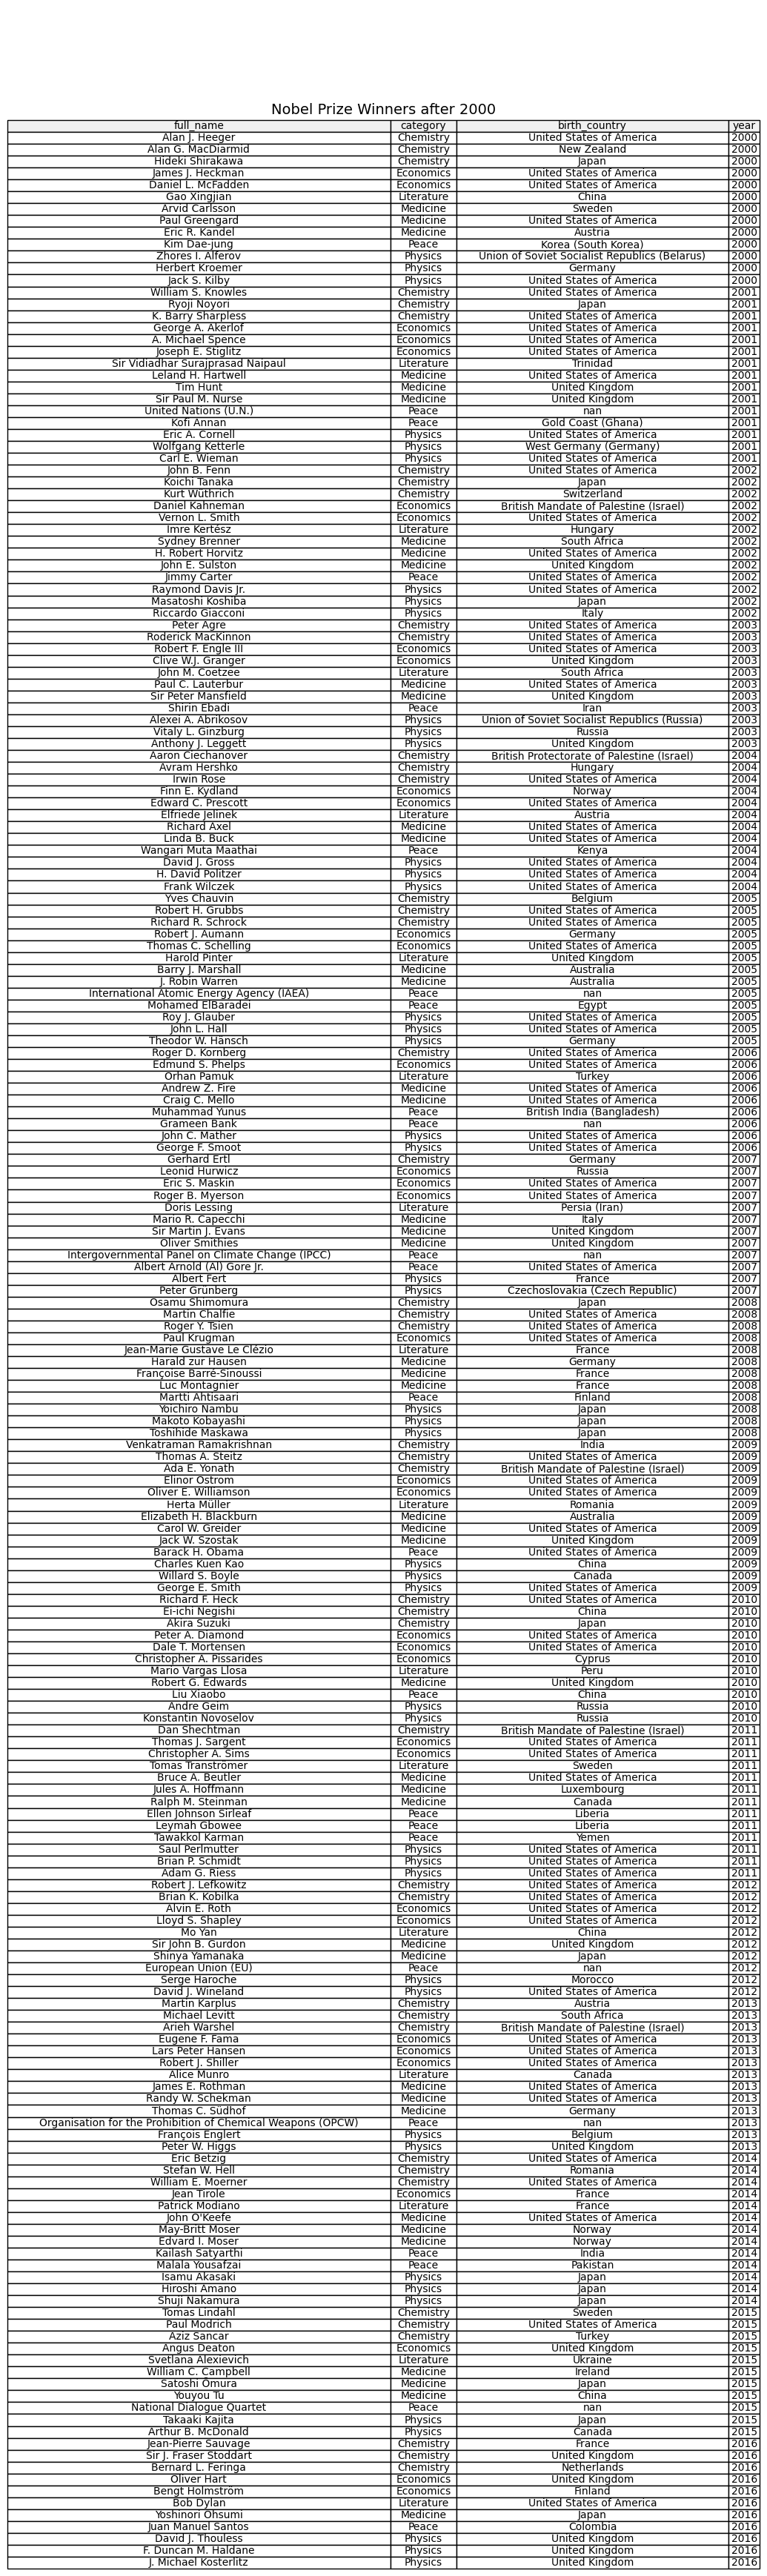

In [24]:
#A list of post-2000 award winners, visualised in the table
nobel = pd.read_csv('/kaggle/input/nobel-peace-prize-winner-dataset/nobel.csv')             
nobel_2000_after = nobel[nobel['year'] >= 2000]
nobel_visual = nobel_2000_after[['full_name', 'category', 'birth_country', 'year']]
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
table = ax.table(cellText=nobel_visual.values,
                 colLabels=nobel_visual.columns,
                 cellLoc='center',
                 loc='bottom',
                 colColours=['#f0f0f0']*len(nobel_visual.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(3.9, 3.9)
table.auto_set_column_width(col=list(range(len(nobel_visual.columns))))
plt.title("Nobel Prize Winners after 2000", fontsize=14, y=0)
plt.subplots_adjust(top=0.3)
plt.show()
